In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
import sys
from Generate_Data import Generate
from Ridge_Linear import Ridge_Linear
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
def Ridge_usage(xTrain, yTrain, xTest, yTest, lamda):
    xTrain_features = gr.extract_features(xTrain)
    rl = Ridge_Linear(xTrain_features, yTrain, lamda)
    rl.fit()
    _,trainErr = rl.predict(xTrain_features, yTrain)
    xTest_features = gr.extract_features(xTest)
    _,testErr = rl.predict(xTest_features, yTest)
    return trainErr,testErr
    
funcs = [
    lambda x: np.power(x, 1),
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 3),
    lambda x: np.power(x, 4),
    lambda x: np.power(x, 5)
]
sigma = 0.8
Nsample = 500
lamda = 0.5

In [3]:
gr = Generate(Nsample, sigma, funcs)

xTrain, yTrain = gr.train_data()
xTrain_features = gr.extract_features(xTrain)

rl = Ridge_Linear(xTrain_features, yTrain, lamda)
rl.fit()

xPre, yPre = gr.predict_data()
xPre_features = gr.extract_features(xPre)

yPre_out,mse = rl.predict(xPre_features, yPre)
print("MSE: ", mse)

#using scikitlearn
clf = Ridge(alpha=lamda)
clf.fit(xTrain, yTrain)
y_pred = clf.predict(xPre)
mse_scikit = mean_squared_error(yPre, y_pred)
print("MSE of scikit_learn:",mse_scikit)

MSE:  0.604434048214522
MSE of scikit_learn: 0.7452324130599686


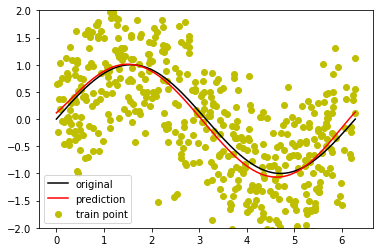

In [4]:
#original function
ori = np.linspace(0, 2*np.pi, 200)
plt.plot(ori,np.sin(ori),c ='k',label = "original")

#Train Points
plt.scatter(xTrain, yTrain, c = 'y',label = "train point")

#Prediction
plt.plot(xPre.ravel(),yPre_out.ravel(),c = 'r',label = "prediction")

plt.ylim(-2, 2)
plt.legend()
plt.show()

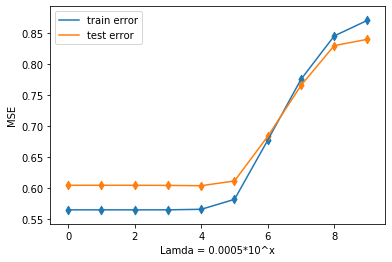

In [5]:
Nlamda = 10
initLamda = 0.0005

trainErr_Arr = []
testErr_Arr = []

for i in range(Nlamda):
    ilamda = initLamda * (10**i)
    trainErr,testErr = Ridge_usage(xTrain, yTrain, xPre, yPre, ilamda)
    trainErr_Arr.append(trainErr)
    testErr_Arr.append(testErr)

xLambPlot = np.array([i for i in range(Nlamda)])
mseLstTrain = np.array(trainErr_Arr)
mseLstTest = np.array(testErr_Arr)


plt.plot(xLambPlot, mseLstTrain, label = "train error")
plt.plot(xLambPlot, mseLstTest, label = "test error")
plt.scatter(xLambPlot, mseLstTrain, marker = 'd')
plt.scatter(xLambPlot, mseLstTest, marker = 'd')
plt.xlabel("Lamda = 0.0005*10^x")
plt.ylabel("MSE")
plt.legend()